https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv( 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv' , header = None )

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.columns = [ 'CRIM' , 'ZN' , 'INDUS', 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' ,  
               'TAX' , 'PTRATIO' , 'B' , 'LSTAT' , 'MEDV' ]

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [14]:
data = df.values

# 01 - y Scaling

In [15]:
X = data[ : , : -1 ]

y = data[ : , -1 ]

In [18]:
X.shape

(506, 13)

In [17]:
y.shape

(506,)

In [21]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import HuberRegressor

In [22]:
pipeline = Pipeline( steps = [ ( 'normalize' , MinMaxScaler( ) ) , 
                               ( 'model' , HuberRegressor( ) ) ] )

In [23]:
model = TransformedTargetRegressor( regressor = pipeline , transformer = MinMaxScaler( ) )

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv = KFold( n_splits = 10 , shuffle = True , random_state = 999 )

In [26]:
from sklearn.model_selection import cross_val_score

In [34]:
from numpy import absolute

from numpy import mean

from numpy import std

In [36]:
scores = cross_val_score( model , X , y , scoring = 'neg_mean_absolute_error' , cv = cv , n_jobs = -1 )

scores = abs( scores )

print( f'MAE : { mean( scores ) } ( { std( scores ) } )' )

MAE : 3.224272686898609 ( 0.42598622180402995 )


In [37]:
from matplotlib import pyplot

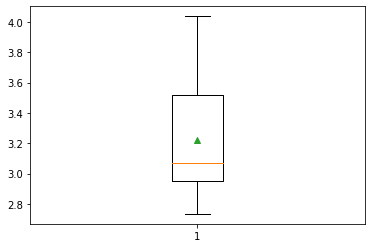

In [38]:
pyplot.boxplot( scores , showmeans = True )

pyplot.show()

# 02 - y Power Transformed

In [40]:
X = data[ : , : -1 ]

y = data[ : , -1 ]

In [41]:
X.shape

(506, 13)

In [42]:
y.shape

(506,)

In [43]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import HuberRegressor

In [54]:
# on peut garder le step normalize pour le régresseur

pipeline = Pipeline( steps = [ ( 'power' , PowerTransformer( ) ) , 
                               ( 'model' , HuberRegressor( ) ) ] )

In [55]:
model = TransformedTargetRegressor( regressor = pipeline , transformer = PowerTransformer( ) )

In [56]:
from sklearn.model_selection import KFold

In [57]:
cv = KFold( n_splits = 10 , shuffle = True , random_state = 999 )

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
from numpy import absolute

from numpy import mean

from numpy import std

In [60]:
scores = cross_val_score( model , X , y , scoring = 'neg_mean_absolute_error' , cv = cv , n_jobs = -1 )

scores = abs( scores )

print( f'MAE : { mean( scores ) } ( { std( scores ) } )' )

MAE : 2.9339213038391887 ( 0.4955221144982787 )


In [52]:
from matplotlib import pyplot

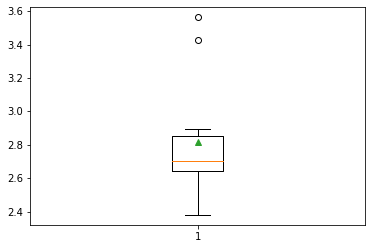

In [53]:
pyplot.boxplot( scores , showmeans = True )

pyplot.show()